# Анализ оттока клиентов "Метанпромбанка"



***Цель Исследования:***<p>

- Исследовать признаки, связанные с повышенным оттоком клиентов, составить портреты типичных клиентов, которые склонны и не склонны уходить из банка;<p>
- Статистически проверить корреляции между признаками и отточностью клиентов банка;<p>
- Провести сегментирование клиентов и сформулировать рекомендации по удержанию клиентов.<p>


### Описание данных:<p>
Анализируется датасет bank_scrooge.csv с данными о клиентах банка «Метанпром».<p>
        Структура файла:<p>
•	USERID — идентификатор пользователя;<p>
•	score — баллы кредитного скоринга;<p>
•	city — город;<p>
•	gender — пол;<p>
•	age — возраст;<p>
•	equity — количество баллов собственности;<p>
•	balance — баланс на счёте;<p>
•	products — количество продуктов, которыми пользуется клиент;<p>
•	credit_card — есть ли кредитная карта;<p>
•	last_activity — активный клиент;<p>
•	EST_SALARY — оценочный доход клиента;<p>
•	сhurn — признак оттока.<p>

### Оглавление.

1. [Загрузка и предобработка данных](#start)
    * [Импорт библиотек](#import)
    * [Импорт данных](#data) 
    * [Просмотр данных](#data_check)
    * [Корректировка названий столбцов](#columns)
    * [Проверка и обработка дубликатов](#duplicated)
    * [Обработка пропущенных значений](#null)
    * [Изменение типов данных](#type)   
    * [Проверка и удаление выбросов](#check)   
    * [Кодирование категориальных данных](#kod)  
    * [Сегментирование непрерывных признаков](#segment_contin)
    * [Вывод](#summary_start)
    
2. [Исследовательский анализ данных](#analysis) 
    * [Составление портретов клиентов](#portrait)
    * [Визуализиация категориальных признаков](#category)   
    * [Визуализиация распределений напрерывных признаков](#continued)   
    * [Корреляционный анализ](#corr_analisis)         
    * [Вывод](#summary_analysis)   
    
3. [Статистическая проверка гипотез](#stats)
    * [Проверка гипотезы о различиях доходов](#H_salary)   
    * [Проверка гипотезы о различиях возраста](#H_age)
    * [Проверка гипотезы о различиях баланса счета](#H_balance)
    * [Проверка гипотезы о различиях количества баллов кредитного скоринга](#H_score')
    * [Проверка гипотезы о различиях количества используемых продуктов и баллов собственности](#H_roducts+')
    * [Вывод](#summary_stats) 
    
4. [Промежуточные выводы](#pre_summary)

5. [Сегментирование клиентов](#segment)
    * [Выделение сегментов клиентов](#make_segment)   
    * [Калибровка сегментов](#size_segment)
    * [Вывод](#summary_segment) 
        
6. [Общий вывод](#summary_final) 

### Материалы.

1. [Презентация](https://disk.yandex.ru/i/f6ztz1lQPOMLFw)

2. [Дашборд](https://public.tableau.com/views/11_final_project_bank_rav_filtr/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Шаг 1. Загрузка и предобработка данных.<a id='start'></a> 

##### Для начала импортируем все необходимые в проекте библиотеки:<a id='import'></a> 

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
from statsmodels.stats.proportion import proportions_ztest as ztest
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import warnings
warnings.simplefilter('ignore')

##### Импортируем данные и ознакомимся с таблицей:<a id='data'></a> 

In [2]:
try:
    data=pd.read_csv('\\dataset\\bank_scrooge.csv')
except:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

#### Посмотрим на данные:<a id='data_check'></a> 

In [3]:
data

USERID  score       city gender   age  equity     balance  products  \
0     183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1     146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2     120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3     225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4     157978  730.0  Ярославль      М  34.0       5      174.00         1   
...      ...    ...        ...    ...   ...     ...         ...       ...   
9995  120553  814.0    Рыбинск      М  27.0       1    78144.65         1   
9996  139170  894.0  Ярославль      М  46.0       0         NaN         1   
9997  115639  903.0  Ярославль      М  24.0       0         NaN         2   
9998  148700  777.0  Ярославль      Ж  68.0       3   865457.97         3   
9999   96267  828.0    Рыбинск      Ж  58.0       3  1180886.70         4   

      credit_card  last_activity  EST_SALARY  churn  
0               0              1    75719.14      1  
1               1              0    86621.77      0  
2               1              1   107683.34      0  
3               0              1   174423.53      1  
4               1              0    67353.16      1  
...           ...            ...         ...    ...  
9995            0              1    18943.64      0  
9996            1              0   196898.29      0  
9997            1              1   108905.09      0  
9998            0              1    86874.90      0  
9999            0              1    21422.37      0  

[10000 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
#сохраним в переменную первоначальный объем датафрейма
start=data.shape
start

(10000, 12)

##### Приведем названия столбцов в корректный вид: <a id='columns'></a> 

In [6]:
#приведем названия столбцов к нижнему регистру
data.columns=data.columns.str.lower()

In [7]:
#исправим написание в столбце userid
data.columns=data.columns.str.replace('userid', 'user_id')

#####  Проверим наличия дубликатов в данных:<a id='duplicated'>

In [8]:
data.duplicated().sum()

0

In [9]:
data['user_id'].duplicated().sum()

73

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Полных дубликатов в базах данных не обнаружено.Однако имеются повторяющиеся дубликаты в идентификаторах пользователей. Проверим дублирующиеся данные.
</div>
<p></p>

In [10]:
ids=data.query('user_id.duplicated()')['user_id']
data.query('user_id in @ids').sort_values('user_id')

user_id  score       city gender   age  equity      balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
7542   117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
5896   120258  905.0  Ярославль      М  30.0       0          NaN         1   
...       ...    ...        ...    ...   ...     ...          ...       ...   
2597   226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
8205   227795  840.0    Рыбинск      М  34.0       2    350768.03         1   
8497   227795  839.0  Ярославль      М  34.0       2    326593.14         2   
6457   228075  839.0    Рыбинск      М  39.0       5    507199.85         3   
1247   228075  932.0  Ярославль      М   NaN       5   7601719.20         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
...           ...            ...         ...    ...  
2597            0              0   934412.61      1  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0  
6457            0              1    85195.80      0  
1247            1              1   408121.16      0  

[146 rows x 12 columns]

In [11]:
#оценим диапазон значений в столбце
data['user_id'].sort_values().unique()

array([ 94561,  94590,  95384, ..., 229130, 229136, 229145], dtype=int64)

In [12]:
#оценим количество дубликатов по городам и оттоку
data.query('user_id in @ids').pivot_table(index='city', columns='churn', values='user_id', aggfunc='count')

churn       0   1
city             
Рыбинск    52  21
Ярославль  44  29

In [13]:
#оценим количество дубликатов в %%
((data.query('user_id in @ids').pivot_table(index='city', columns='churn', values='user_id', aggfunc='count')/
  data.query('city !="Ростов"').pivot_table(index='city', columns='churn', values='user_id', aggfunc='count'))*100).round(2)

churn         0     1
city                 
Рыбинск    2.30  4.81
Ярославль  0.92  2.60

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Дублирование пользователей по user_id произошло по городам Рыбинску и Ярославлю в равном количестве, по прочим признакам такой закономерности не наблюдается. Предположительно, имеет место техническая ошибка присвоения одинаковых идентификаторов одномоментно в двух городах. Удалим дубликаты, относящиеся к Ярославлю, поскольку выборка по этому городу больше и удаление данных в меньшей степени повлияет на результаты.
</div>
<p></p>

In [14]:
data=data.query('user_id not in @ids or city!="Ярославль"')

##### Проверим наличие пропусков:<a id='null'>

In [15]:
data_isna = data.isna().agg(['sum', 'mean'])
data_isna.loc['sum'] = data_isna.loc['sum'].round(0)
data_isna.loc['mean'] = (data_isna.loc['mean']*100).round(2)
data_isna

user_id  score  city  gender    age  equity  balance  products  \
sum       0.0    0.0   0.0     0.0  14.00     0.0  2271.00       0.0   
mean      0.0    0.0   0.0     0.0   0.14     0.0    22.88       0.0   

      credit_card  last_activity  est_salary  churn  
sum           0.0            0.0         0.0    0.0  
mean          0.0            0.0         0.0    0.0

<p></p>

<div style="border:solid black 1px; padding: 20px">
В столбце с указанием возраста имеется небольшое количество пропусков данных (менее 1%). 
В столбце с информацией о балансе клиента количество пропусков в данных более 20%.
    
</div>
<p></p>

In [16]:
data.query('age.isna()').sort_values('user_id')

user_id  score       city gender  age  equity     balance  products  \
3091   138660  836.0     Ростов      Ж  NaN       5   294315.53         2   
9819   140934  832.0    Рыбинск      Ж  NaN       3   385763.16         2   
5495   151662  884.0    Рыбинск      Ж  NaN       0         NaN         1   
7345   184913  829.0  Ярославль      Ж  NaN       3   188648.77         2   
9380   187459  894.0    Рыбинск      М  NaN       0         NaN         1   
2165   187635  692.0    Рыбинск      Ж  NaN       0         NaN         1   
9301   202983  942.0    Рыбинск      Ж  NaN       0         NaN         1   
8385   206759  915.0    Рыбинск      М  NaN       0         NaN         1   
7236   210135  908.0    Рыбинск      Ж  NaN       4  1120340.31         3   
4912   210674  834.0    Рыбинск      М  NaN       1   238330.52         2   
5470   218868  827.0    Рыбинск      Ж  NaN       4   448959.07         2   
7248   219343  920.0    Рыбинск      Ж  NaN       0         NaN         1   
9104   222480  776.0    Рыбинск      Ж  NaN       5   796735.09         1   
8070   226550  940.0    Рыбинск      М  NaN       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
3091            0              1    63310.22      1  
9819            0              1    59651.35      0  
5495            1              1   137500.77      0  
7345            0              1    75206.90      0  
9380            1              0   178012.28      0  
2165            1              1   160368.82      0  
9301            1              1   163804.73      0  
8385            1              0    71179.53      0  
7236            1              1    85002.15      0  
4912            0              1    93775.06      0  
5470            1              1    67835.95      0  
7248            1              0   159248.67      0  
9104            1              1    55073.63      0  
8070            0              1   147696.95      0

In [17]:
#оценим количество пропусков в %%
((data.query('age.isna()').pivot_table(index='city', columns='churn', values='user_id', aggfunc='count')/
  data.pivot_table(index='city', columns='churn', values='user_id', aggfunc='count'))*100).round(2)

churn         0     1
city                 
Ростов      NaN  0.38
Рыбинск    0.53   NaN
Ярославль  0.02   NaN

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Пропуски в столбце с возрастом обнаруживаются во всех городах, независимо от пола клиента и других признаков, то есть относятся к категории MСAR. Учитывая их малое количество по отдельным городам и признаку оттока, удалим строки с пропусками в столбце 'age'.
</div>
<p></p>

In [18]:
data=data.dropna(subset=['age'])

In [19]:
#проверим, к какой категории клиентов относятся пропуски в столбе 'balance'. 
((data.query('balance.isna()').pivot_table(index='churn', columns='city', values='user_id', aggfunc='count')/
  data.pivot_table(index='churn', columns='city', values='user_id', aggfunc='count'))*100).round(2)

city   Ростов  Рыбинск  Ярославль
churn                            
0       20.33    25.91      30.36
1        0.38     0.92       0.74

In [20]:
((data.query('balance.isna()').pivot_table(index='churn', columns='gender', values='user_id', aggfunc='count')/
  data.pivot_table(index='churn', columns='gender', values='user_id', aggfunc='count'))*100).round(2)

gender      Ж      М
churn               
0       23.04  33.05
1        0.48   0.86

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Преимущественно пропуски данных в столбе 'balance' относятся к пользователям, являющимся клиентами банка независимо от города размещения и пола. Проанализируем связь с другими признаками. 
</div>
<p></p>

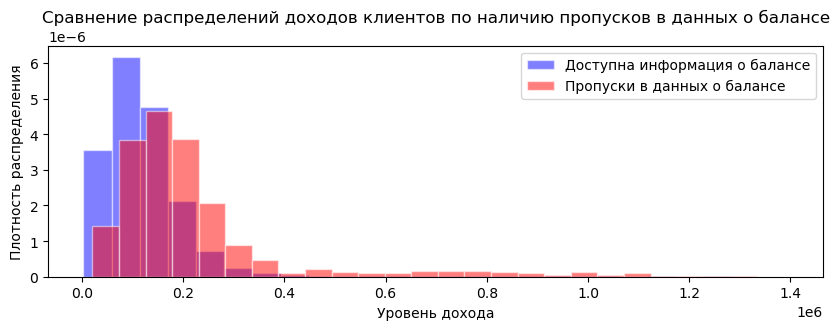

In [21]:
# визуализируем связь с доходом
plt.figure(figsize=(10,3))
plt.hist(x=data.query('not balance.isna()')['est_salary'], bins=25, color='blue', alpha = 0.5, edgecolor='white', 
         label='Доступна информация о балансе', density=True)
plt.hist(x=data.query('balance.isna()')['est_salary'], bins=25, color='red', alpha = 0.5, edgecolor='white', 
         label='Пропуски в данных о балансе', density=True)
plt.title('Сравнение распределений доходов клиентов по наличию пропусков в данных о балансе')
plt.xlabel('Уровень дохода')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show;

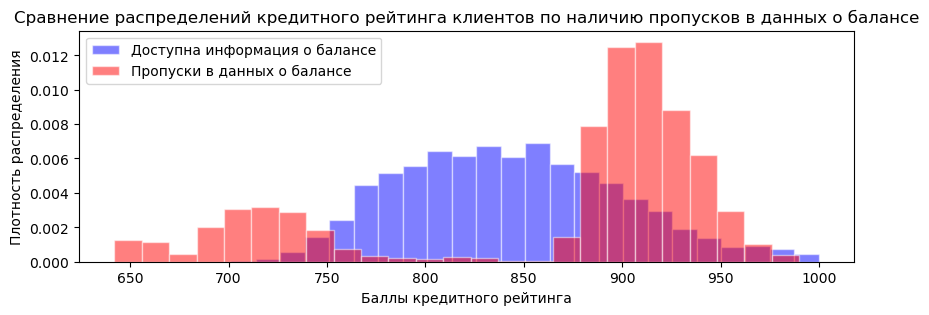

In [22]:
# визуализируем связь с баллами кредитного скоринга
plt.figure(figsize=(10,3))
plt.hist(x=data.query('not balance.isna()')['score'], bins=25, color='blue', alpha = 0.5, edgecolor='white', 
         label='Доступна информация о балансе', density=True)
plt.hist(x=data.query('balance.isna()')['score'], bins=25, color='red', alpha = 0.5, edgecolor='white', 
         label='Пропуски в данных о балансе', density=True)
plt.title('Сравнение распределений кредитного рейтинга клиентов по наличию пропусков в данных о балансе')
plt.xlabel('Баллы кредитного рейтинга')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show;

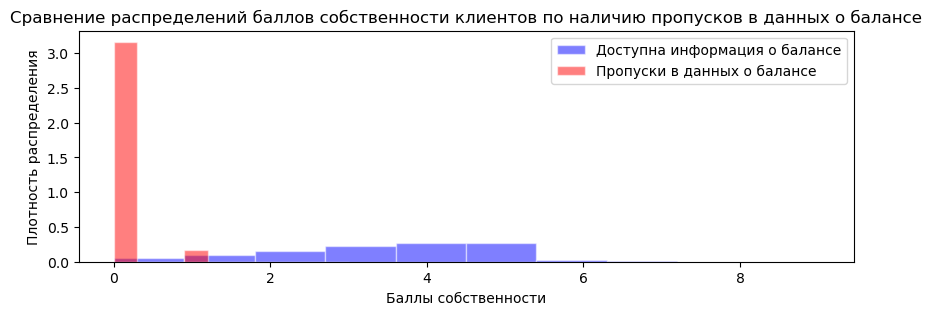

In [23]:
# визуализируем связь с баллами собственности
plt.figure(figsize=(10,3))
plt.hist(x=data.query('not balance.isna()')['equity'], bins=10, color='blue', alpha = 0.5, edgecolor='white',
         label='Доступна информация о балансе', density=True)
plt.hist(x=data.query('balance.isna()')['equity'], bins=10, color='red', alpha = 0.5, edgecolor='white', 
         label='Пропуски в данных о балансе', density=True)
plt.title('Сравнение распределений баллов собственности клиентов по наличию пропусков в данных о балансе')
plt.xlabel('Баллы собственности')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show;

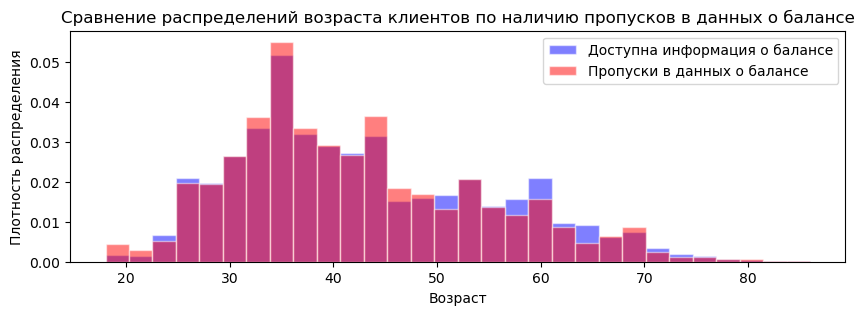

In [24]:
# визуализируем связь с возрастом
plt.figure(figsize=(10,3))
plt.hist(x=data.query('not balance.isna()')['age'], bins=30, color='blue', alpha = 0.5, edgecolor='white', 
         label='Доступна информация о балансе', density=True)
plt.hist(x=data.query('balance.isna()')['age'], bins=30, color='red', alpha = 0.5, edgecolor='white', 
         label='Пропуски в данных о балансе', density=True)
plt.title('Сравнение распределений возраста клиентов по наличию пропусков в данных о балансе')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show;

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Пропуски данных в столбе 'balance' чаще появляются у клиентов банка с высоким уровнем дохода. Как правило, если у клиента отсутствует информация о балансе счета, то и в баллах собственности проставлен 0, что также может пониматься как отсутствие информации о собственности. Кредитный рейтинг у клиентов со скрытым балансом также отличается от выборки: пиковые значения либо на низком уровне, либо выше среднего. Связь с возрастом клиента, также как и с другими другими анкетными характеристиками, отсутствует. Таким образом, пропуски данных с информации о балансе счета не являются случайными. Учитывая количество пропусков, замена их каким-либо расчетным значением не представляется целесообразным, так как приведет к существенному искажению результатов анализа.    
</div>
<p></p>

##### Проверим значения в столбцах 'score' и 'age' и изменим тип данных:<a id='type'>

In [25]:
data['score'].unique()

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  923.,  906.,
        927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,  876.,
        922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,  776.,
        868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,  924.,
        811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,  792.,
        888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,  789.,
        737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,  825.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

In [26]:
data['age'].unique()

array([25., 37., 30., 51., 34., 56., 39., 54., 67., 52., 41., 31., 28.,
       35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26., 27.,
       60., 72., 50., 46., 55., 58., 71., 38., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., 83., 82., 81.,
       84., 79., 86.])

<p></p>

<div style="border:solid black 1px; padding: 20px">
В обоих столбцах отсутствуют дробные значения, изменим тип данных на целочисленные.
    
</div>
<p></p>

In [27]:
data['score']=data['score'].astype(int)
data['age']=data['age'].astype(int)

<p></p>

<div style="border:solid black 1px; padding: 20px">
Тип данных в столбцах 'score' и 'age' переведен в формат int.
    
</div>
<p></p>

##### Проверим распределения и выбросы:<a id='check'>

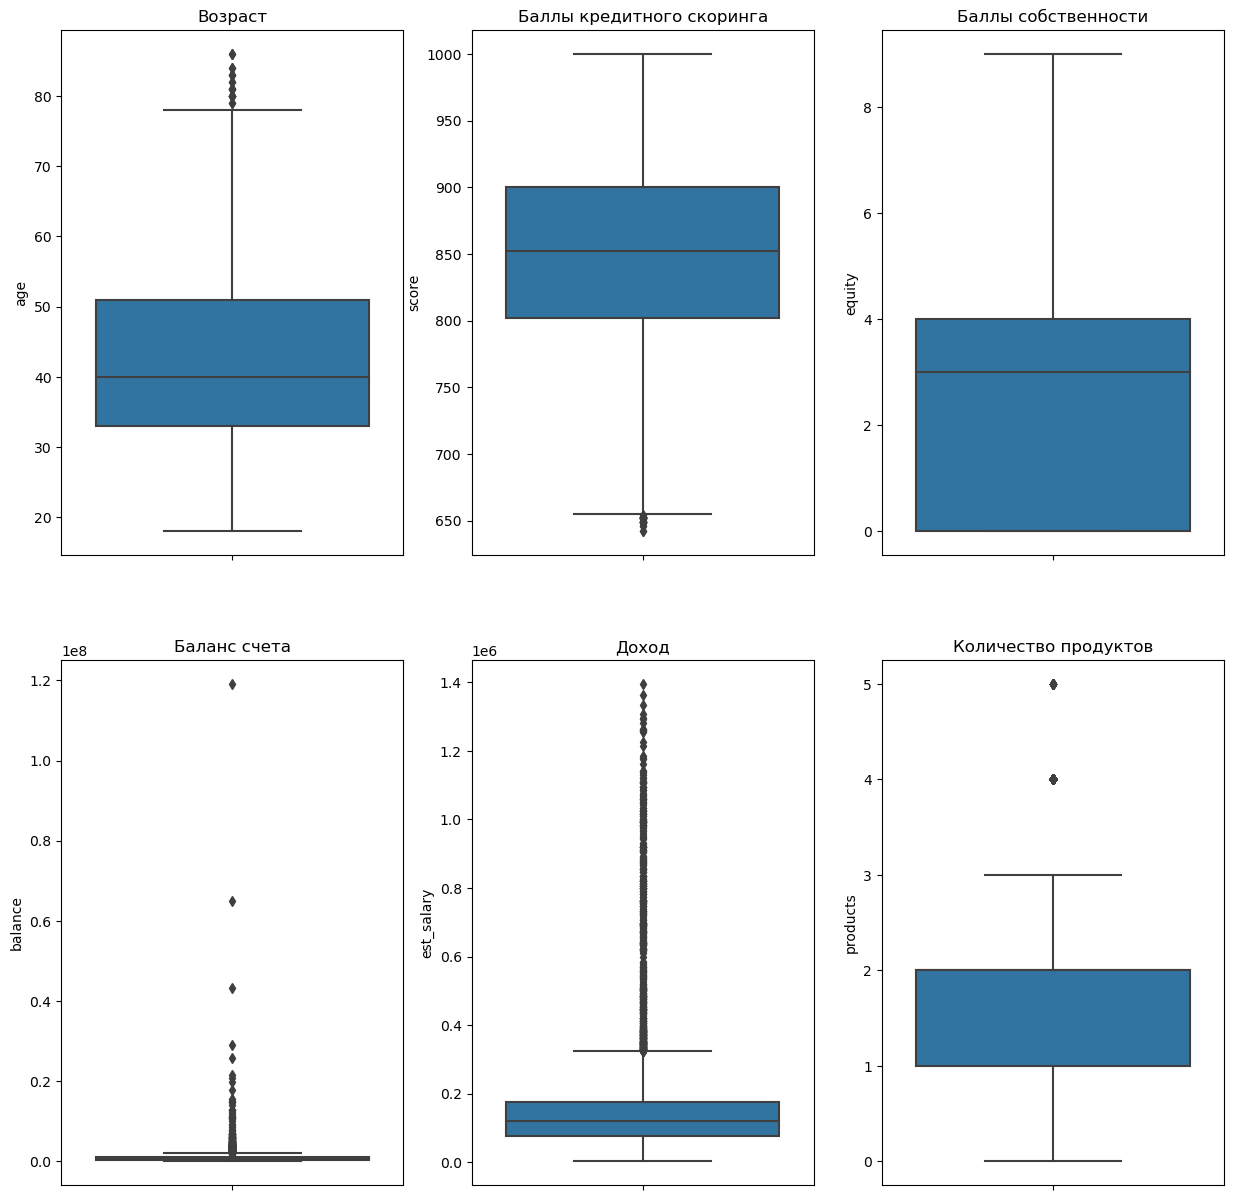

In [28]:
#визуализируем разброс непрерывных переменных
plt.figure(figsize=(15, 15))

# age
ax1 = plt.subplot(2, 3, 1)
box = sns.boxplot(y=data['age'], data=data)
plt.title('Возраст')

# score
ax2 = plt.subplot(2, 3, 2)
box = sns.boxplot(y=data['score'], data=data)
plt.title('Баллы кредитного скоринга')

# equity
ax3 = plt.subplot(2, 3, 3)
box = sns.boxplot(y=data['equity'], data=data)
plt.title('Баллы собственности')

# balance
ax4 = plt.subplot(2, 3, 4)
box = sns.boxplot(y=data['balance'], data=data)
plt.title('Баланс счета')

# est_salary
ax5 = plt.subplot(2, 3, 5)
box = sns.boxplot(y=data['est_salary'], data=data)
plt.title('Доход')

# products
ax6 = plt.subplot(2, 3, 6)
box = sns.boxplot(y=data['products'], data=data)
plt.title('Количество продуктов')

plt.show();

<div style="border:solid black 1px; padding: 20px">
Выбросы обнаружены по всем признакам кроме баллов собственности. Оценим их количество.   
</div>

In [29]:
#введем функцию для расчета выбросов
def outers(data, col):
    print('Выбросы для ', col)
    print('Нижняя граница выбросов ', data[col].quantile(0.25)-st.iqr(data[col])*1.5)

    print('Количество выбросов ниже границы', data.loc[(data[col]<(data[col].quantile(0.25)-st.iqr(data[col])*1.5)), 
          col].count())

    print('Верхняя граница выбросов ', data[col].quantile(0.75)+st.iqr(data[col])*1.5)

    print('Количество выбросов выше границы', data.loc[(data[col]>(data[col].quantile(0.75)+st.iqr(data[col])*1.5)), 
          col].count())

    print('Доля выбросов', ((data.loc[(data[col]<(data[col].quantile(0.25)-st.iqr(data[col])*1.5)), 
            col].count()
      +data.loc[(data[col]>(data[col].quantile(0.75)+st.iqr(data[col])*1.5)), 
             col].count())
     /start[0]))
    return

In [30]:
#рассчитаем выбросы
outers(data, 'age')

Выбросы для  age
Нижняя граница выбросов  6.0
Количество выбросов ниже границы 0
Верхняя граница выбросов  78.0
Количество выбросов выше границы 22
Доля выбросов 0.0022


In [31]:
outers(data, 'score')

Выбросы для  score
Нижняя граница выбросов  655.0
Количество выбросов ниже границы 33
Верхняя граница выбросов  1047.0
Количество выбросов выше границы 0
Доля выбросов 0.0033


In [32]:
outers(data, 'equity')

Выбросы для  equity
Нижняя граница выбросов  -6.0
Количество выбросов ниже границы 0
Верхняя граница выбросов  10.0
Количество выбросов выше границы 0
Доля выбросов 0.0


In [33]:
outers(data.dropna(subset=['balance']), 'balance')

Выбросы для  balance
Нижняя граница выбросов  -727501.56
Количество выбросов ниже границы 0
Верхняя граница выбросов  1999183.48
Количество выбросов выше границы 421
Доля выбросов 0.0421


In [34]:
outers(data, 'est_salary')

Выбросы для  est_salary
Нижняя граница выбросов  -73844.22000000003
Количество выбросов ниже границы 0
Верхняя граница выбросов  323410.18000000005
Количество выбросов выше границы 473
Доля выбросов 0.0473


In [35]:
outers(data, 'products')

Выбросы для  products
Нижняя граница выбросов  -0.5
Количество выбросов ниже границы 0
Верхняя граница выбросов  3.5
Количество выбросов выше границы 481
Доля выбросов 0.0481


<p></p>

<div style="border:solid black 1px; padding: 20px">
Количество выбросов по каждому из признаков не превышает 5%. 
    
</div>
<p></p>

In [36]:
(data.loc[(data['balance']>(data['balance'].quantile(0.75)+st.iqr(data['balance'])*1.5)),'user_id']).append(
    data.loc[(data['est_salary']>(data['est_salary'].quantile(0.75)+st.iqr(data['est_salary'])*1.5)),'user_id']).nunique()/start[0]

0.0473

In [37]:
(data.loc[(data['balance']>(data['balance'].quantile(0.75)+st.iqr(data['balance'])*1.5)),'user_id']).append(
    data.loc[(data['est_salary']>(data['est_salary'].quantile(0.75)+st.iqr(data['est_salary'])*1.5)),'user_id']).append(
    data.loc[(data['products']>(data['products'].quantile(0.75)+st.iqr(data['products'])*1.5)),'user_id']).nunique()/start[0]

0.0928

<div style="border:solid black 1px; padding: 20px">
Выбросы по уровню дохода и балансу счета - это одни и те же клиенты с аномально высоким уровнем дохода и накоплений. Учитывая выгоды для банка удержания данной категории клиентов, их можно выделить в отдельный сегмент VIP-клиентов для оценки оттока, но исключить из анализа общей выборки для избежания значительных отклонений в расчетах. <p>
Выбросов по возрасту и баллам кредитного скоринга немного, их мы удалим из выборки. <p>
Выбросы по количеству продуктов оставим в анализе, так как это уникальные клиенты, использующие максимальное количество продуктов банка, кроме того их удаление уменьшит выборку более чем на 10%.   
</div>

In [38]:
ids_vip=(data.loc[(data['balance']>(data['balance'].quantile(0.75)+st.iqr(data['balance'])*1.5)),'user_id']).append(
    data.loc[(data['est_salary']>(data['est_salary'].quantile(0.75)+st.iqr(data['est_salary'])*1.5)),'user_id'])

vip=data.query('user_id in @ids_vip')

In [39]:
data = data.query('user_id not in @ids_vip')
data = data.loc[(data['age']<=(data['age'].quantile(0.75)+st.iqr(data['age'])*1.5))]
data = data.loc[(data['score']>=(data['score'].quantile(0.25)-st.iqr(data['score'])*1.5))]

<div style="border:solid black 1px; padding: 20px">
Удалены выбросы по возрасту и баллам кредитного скоринга. Данные по клиентам с высоким уровнем дохода и накоплений выведены из анализа в отдельный сегмент для оценки оттока.    
</div>

##### Сравним с первоначальным объемом данных:

In [40]:
print('После предобработки осталось {0:.2%} данных.'.format(data.shape[0]/start[0]))

После предобработки осталось 93.65% данных.


##### Создадим столбцы с кодами категориальных данных: <a id='kod'> 

In [41]:
data['city_id']=data['city'].replace({'Ростов':'Rostov','Рыбинск':'Rybinsk','Ярославль':'Yaroslavl'})
data=pd.get_dummies(data, columns=['city_id'])

In [42]:
for index in data.index:
    if data.loc[index, 'gender']=='М':
        data.loc[index,'gender_id']=1
    else:
        data.loc[index,'gender_id']=0
data['gender_id']=data['gender_id'].astype(int)
data.head(5)

user_id  score       city gender  age  equity     balance  products  \
0   183012    850    Рыбинск      Ж   25       1    59214.82         2   
1   146556    861    Рыбинск      Ж   37       5   850594.33         3   
2   120722    892    Рыбинск      Ж   30       0         NaN         1   
3   225363    866  Ярославль      Ж   51       5  1524746.26         2   
4   157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  city_id_Rostov  \
0            0              1    75719.14      1               0   
1            1              0    86621.77      0               0   
2            1              1   107683.34      0               0   
3            0              1   174423.53      1               0   
4            1              0    67353.16      1               0   

   city_id_Rybinsk  city_id_Yaroslavl  gender_id  
0                1                  0          0  
1                1                  0          0  
2                1                  0          0  
3                0                  1          0  
4                0                  1          1

<p></p>

<div style="border:solid black 1px; padding: 20px">
Столбцы с кодами города и пола созданы, отражаются корректно.
    
</div>
<p></p>

##### Создадим столбцы с сегментами для непрерывных признаков: <a id='segment_contin'> 

In [43]:
data['cut_age'] = pd.qcut(data['age'], q=24)
data['cut_balance'] = pd.qcut(data['balance'], q=24)
data['cut_balance'] = data['cut_balance'].cat.add_categories('NaN').fillna('NaN')
data['cut_salary'] = pd.qcut(data['est_salary'], q=24)
data['cut_score'] = pd.qcut(data['score'], q=24)



### Вывод <a id='summary_start'>

<p></p>

<div style="border:solid green 2px; padding: 20px">

В датасете представлена информация о 10000 клиентах банка. <p>
Полные дубликаты в датасете не обнаружены, удалены дубликаты, обнаруженные идентификационных номерах клиентов. 
Удалены случайные пропуски данных в столбце с возрастом. Пропуски данных в столбце с балансом счета не являются случайными, но учитывая объем пропущенных данных их заполнение не представляется возможным. Удалены выбросы данных по возрасту и баллам кредитного скоринга, в отдельный сегмент выведены клиенты с аномально высокими доходами и балансом счета.
На основании текстовых данных в столбцая с обозначением города и пола, созданы столбцы с кодировкой признаков города и пола. В столбцах с информацией о баллах кредитного скоринга и возраста тип данных изменен на целочисленные значения.<p>
    
После удаления данных на этапе предобработки осталось 93,67% данных.<p>
       
</div>
<p></p>

## Шаг 2. Исследовательский анализ данных.<a id='analisis'>

##### Составление портретов клиентов:<a id='portrait'>

In [44]:
print('Средний уровень оттока по банку составляет', ((100*data['churn'].mean()).round(2)),'%')

Средний уровень оттока по банку составляет 18.3 %


In [45]:
print('Количество клиетнов в оттоке составляет', ((data['churn'].sum())))

Количество клиетнов в оттоке составляет 1714


In [46]:
#выведем средние для составления портретов клиентов и расчитаем различия
portrait= data.drop(['user_id'], axis=1).pivot_table(index='churn', aggfunc='mean').round(2).T
portrait.columns=['сlients','outflow']
portrait['all']=data.mean().round(2)
portrait['difference']=(100*((portrait['outflow']/portrait['сlients'])-1)).round(2)
portrait.sort_values('difference')

сlients    outflow        all  difference
credit_card             0.70       0.55       0.68      -21.43
city_id_Rybinsk         0.28       0.25       0.27      -10.71
age                    42.97      41.55      42.71       -3.30
city_id_Rostov          0.15       0.15       0.15        0.00
score                 845.29     860.55     848.08        1.81
est_salary         122261.64  128434.44  123391.40        5.05
city_id_Yaroslavl       0.57       0.60       0.58        5.26
products                1.78       2.36       1.89       32.58
gender_id               0.46       0.65       0.49       41.30
last_activity           0.48       0.70       0.52       45.83
balance            664456.82  990969.76  739145.89       49.14
equity                  2.47       3.74       2.70       51.42

<p></p>

<div style="border:solid black 1px; padding: 20px">
Клиентами банка чаще остаются женщины 43 лет из Ярославля с доходом более 122 000 и балансом счета более 660 000, пользующиеся 2 продуктами банка, в том числе кредитной картой, не совершавшие действий в последний месяц, имеющие 2 балла собственности и 845 баллов кредитного скоринга.<p>
В отток попали мужчины в возрасте 42 лет из Ярославля с доходом более 128 000 и балансом счета более 990 000, пользующиеся 2 продуктами банка, в том числе кредитной картой, совершавшие действий в последний месяц, имеющие 4 балла собственности и 860 баллов кредитного скоринга.  <p>    
</div>
<p></p>

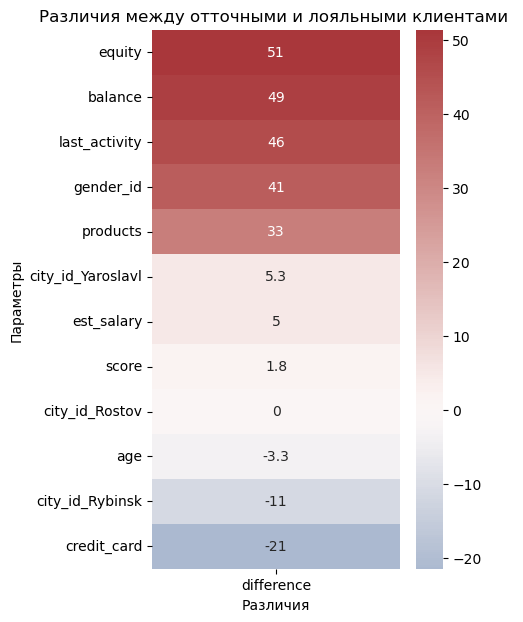

In [47]:
plt.figure(figsize=(4,7))
ax=sns.heatmap(portrait[['difference']].sort_values('difference', ascending=False), annot=True, cmap='vlag', center=0)
plt.title('Различия между отточными и лояльными клиентами ')
ax.set(xlabel='Различия', ylabel='Параметры')
plt.show;

<p></p>

<div style="border:solid black 1px; padding: 20px">

Наибольшие отличия между отточными и лояльными клиентами отмечаются в:<p>
    - баллах собственности - у отточных клиентов количество баллов собственности выше в среднем на 51%;<p>
    - балансе счета - у отточных клиентов баланс выше на 49%;<p>
    - уровне активности - уходящие из банка клиенты на 46% чаще совершают действия;<p>
    - поле - мужчины на 41% чаще уходят из банка;<p>
    - количестве используемых продуктов - отточные клиенты используют на 33% больше продуктов банка;<p>
    - использовании кредитных карт - ими на 21% чаще пользуются лояльные клиенты.<p>
Также в Рыбинске доля лояльных клиентов выше, чем в среднем по банку, в Ростове и Ярославле, наоборот, отток выше среднего. Возможно это связано с размерами городов и уровнем конкуренции среди банков, - в областных центрах выше конкуренция и больше выбора для клиентов.<p>
Различия между отточными и лояльными клиентами по возрасту, доходу и кредитному рейтингу невелики.
    
</div>
<p></p>

##### Визуализиация категориальных признаков:<a id='category'>

In [48]:
#создадим функцию для группировки категориальных данных для визуализации
def group_category(attribute):
    group=data.pivot_table(index=attribute, values='churn', aggfunc='mean')
    group.columns=['отток']
    group['отток']=(group['отток']*100).round(2)
    return group

In [49]:
#создадим функцию для группировки пар признаков для визуализации
def pivot_group(index, attribute):
    group=data.pivot_table(index=index, columns=attribute, values='churn', aggfunc='mean').T
    return group

In [50]:
#группируем анкетные данные
anketa=group_category('gender').append(group_category('city'))
anketa.index=anketa.index.str.replace('Ж','женщины')
anketa.index=anketa.index.str.replace('М','мужчины')
anketa

отток
женщины    12.85
мужчины    23.86
Ростов     18.57
Рыбинск    16.56
Ярославль  19.05

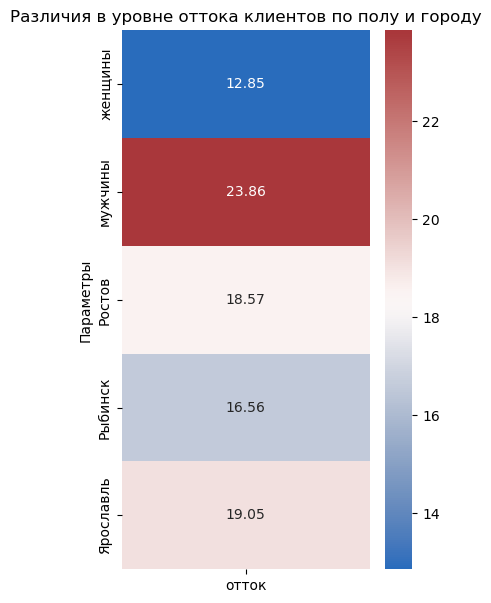

In [51]:
#визуализируем уровень оттока по городу и полу
plt.figure(figsize=(4,7))
ax=sns.heatmap(anketa, annot=True, fmt='.2f', cmap='vlag', center=((100*data['churn'].mean()).round(2)))
plt.title('Различия в уровне оттока клиентов по полу и городу')
ax.set(ylabel='Параметры')
plt.show;

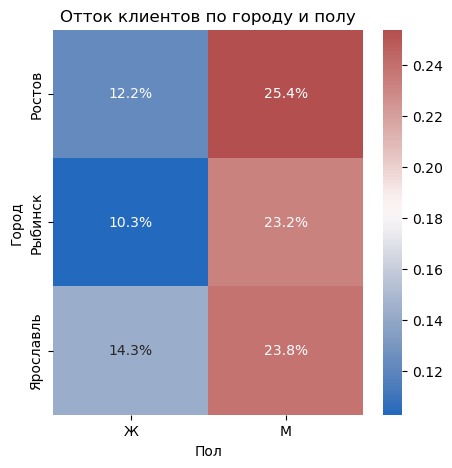

In [52]:
#визуализируем уровень оттока по городу и полу при пересечении признаков
plt.figure(figsize=(5,5))
ax=sns.heatmap(pivot_group('gender', 'city'), annot=True, fmt='.1%', cmap='vlag', center=((data['churn'].mean()).round(4)))
plt.title('Отток клиентов по городу и полу')
ax.set(xlabel='Пол', ylabel='Город')
plt.show;

<p></p>

<div style="border:solid black 1px; padding: 20px">

Отток среди клиентов-мужчин почти в два раза выше, чем среди клиентов-женщин, а также выше среднего уровня. <p>
Различия между городами невелики и соответствуют среднему показателю оттока, при этом наименьший отток наблюдается в Рыбинске.<p>
При перекрестном сравнении доли оттока по городу и полу выводы подтверждаются.
    
</div>
<p></p>

In [53]:
#группируем данные по банковским продуктам
products=group_category('products')
products.index=(products.index.astype(str) +' продуктов банка')

#группируем данные по кредитным картам
credit_card=group_category('credit_card')
credit_card.index=['не пользуются кредитной картой', 'пользуются кредитной картой']

#аггрегируем все банковские данные 
bank=products.append(credit_card)
bank

отток
1 продуктов банка                7.50
2 продуктов банка               18.81
3 продуктов банка               28.51
4 продуктов банка               62.01
5 продуктов банка               38.89
не пользуются кредитной картой  25.35
пользуются кредитной картой     14.92

In [54]:
#визуализируем уровень оттока по количеству банковских продуктов
fig=px.bar(bank, x=bank.index, y='отток', text='отток', color='отток', color_continuous_scale='RdBu_r')
fig.add_hline(y=((100*data['churn'].mean()).round(2)), line_width=3, line_dash='dash', line_color='yellow', 
              annotation_text='средний уровень оттока (18.06%)')
fig.update_layout(title_text='Уровень оттока по количеству банковских продуктов и наличию кредитной карты',
                 xaxis_title_text='Параметры',
                 yaxis_title_text='Уровень оттока, %')
fig.show();

<div style="border:solid black 1px; padding: 20px">

Максимальный отток клиентов среди клиентов, не пользующихся продуктами банка, является следствием малого объема выборки. В зоне риска клиенты, пользующиеся 3-5 продуктами банка - уровень оттока среди таких клиентов выше среднего более чем на 10%. <p>
Немного выше среднего также отток среди клиентов, не пользующихся кредитными картами.     
</div>

In [55]:
#оценим отток в абсолютных значениях
data.pivot_table(index='products', values='churn', aggfunc='count')

churn
products       
1          2975
2          4939
3           996
4           437
5            18

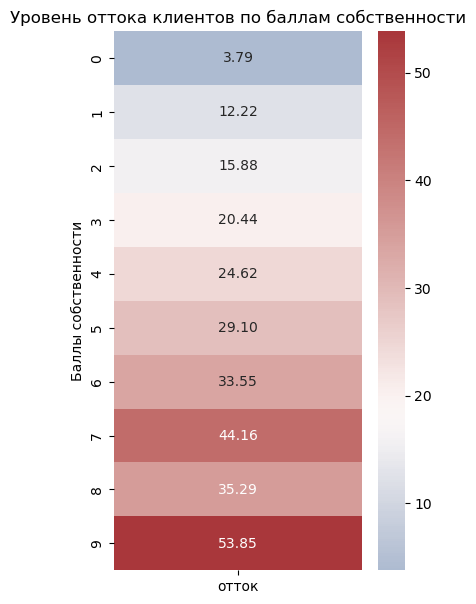

In [56]:
#Визуализируем данные по баллам собственности
plt.figure(figsize=(4,7))
ax=sns.heatmap(group_category('equity'), annot=True, fmt='.2f', cmap='vlag', center=((100*data['churn'].mean()).round(2)))
plt.title('Уровень оттока клиентов по баллам собственности')
ax.set(ylabel='Баллы собственности')
plt.show;

<div style="border:solid black 1px; padding: 20px">

Чем больше баллов собственности, тем выше отток клиентов банка. Для клиентов с максимальными 9 баллами собственности количество уходящих клиентов превышает число лояльных. Отток превышает средний показатель, начиная с 3 баллов собственности, от 5 и более баллов отток выше среднего более чем на 10%.
    
</div>

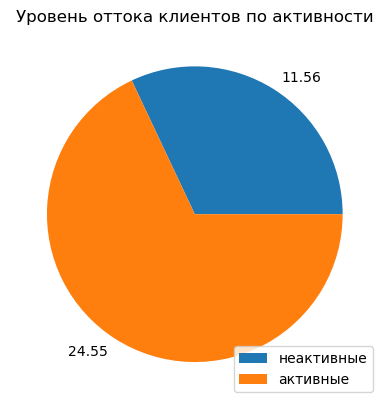

In [57]:
#визуализируем данные по уровню активности
activity=group_category('last_activity')
activity.index=['неактивные', 'активные']
plt.pie(x=activity['отток'], labels=activity['отток'])
plt.title('Уровень оттока клиентов по активности')
plt.legend(labels=activity.index, loc='lower right')
plt.show;

<div style="border:solid black 1px; padding: 20px">

Немного выше среднего уровня отток среди активных клиентов. Это может быть следствием закрытия продуктов при уходе из банка, что также засчитывается как активность клиента.
</div>

##### Визуализиация распределений напрерывных признаков:<a id='continued'>

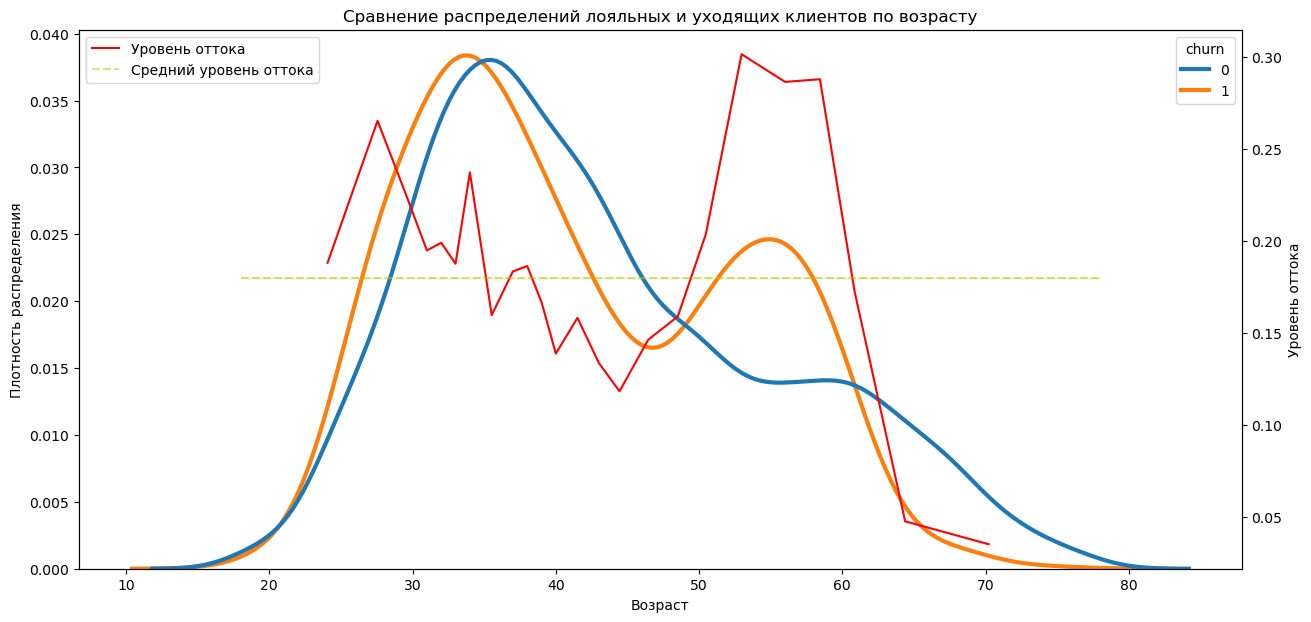

In [58]:
# визуализируем связь с возрастом
data_cut_age = data.groupby('cut_age').agg({'age':'mean', 'churn':'mean'})

plt.figure(figsize=(15,7))
ax=sns.kdeplot(data=data, x='age', hue='churn', common_norm=False, linewidth=3, legend=True)
plt.title('Сравнение распределений лояльных и уходящих клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')
ax2 = ax.twinx()
lineplot = sns.lineplot(x=data_cut_age['age'], y=data_cut_age['churn'], ax=ax2, linestyle='-', color='r', 
                        label='Уровень оттока')
lineplot2 = sns.lineplot(x=data['age'], y=((data['churn'].mean()).round(2)), ax=ax2, linestyle='--', color='y', 
                         alpha=0.5, label='Средний уровень оттока')
plt.legend(loc='upper left')
plt.ylabel('Уровень оттока')

plt.show;

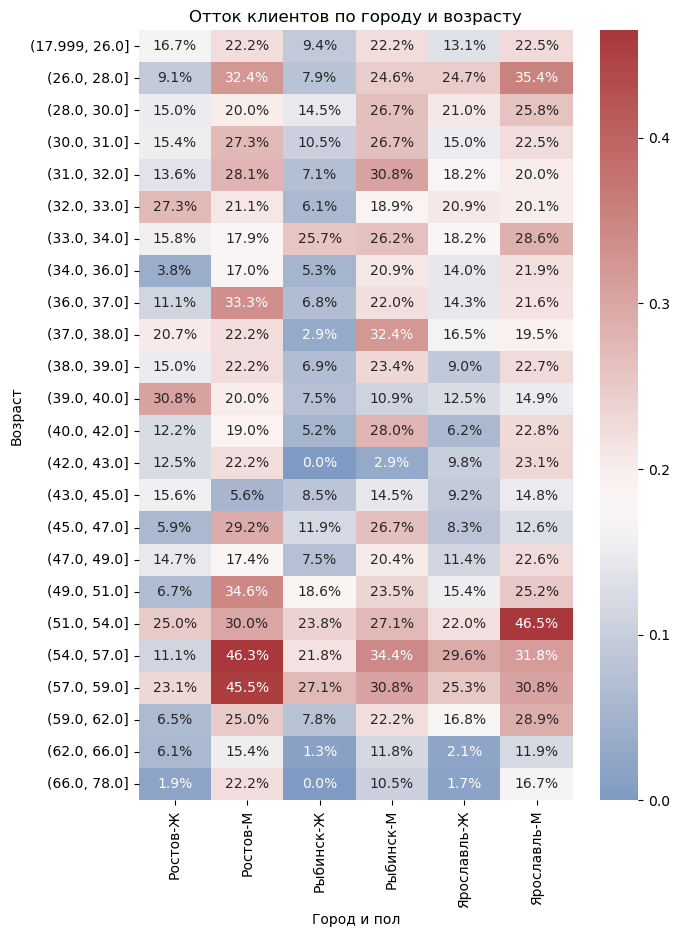

In [59]:
#оценим уровни оттока в разбивке по полу и городу
plt.figure(figsize=(7,10))
sns.heatmap(pivot_group(('city', 'gender'), 'cut_age'), annot=True, fmt='.1%', cmap='vlag', center=0.18)
plt.title('Отток клиентов по городу и возрасту')
plt.xlabel('Город и пол')
plt.ylabel('Возраст')
plt.show;

<p></p>

<div style="border:solid black 1px; padding: 20px">

Отток клиентов выше в возрастных группах от 25 до 34 лет, а также с 50 до 60 лет, при чем преимущественно за счет мужчин, независимо от города проживания.
    
</div>
<p></p>

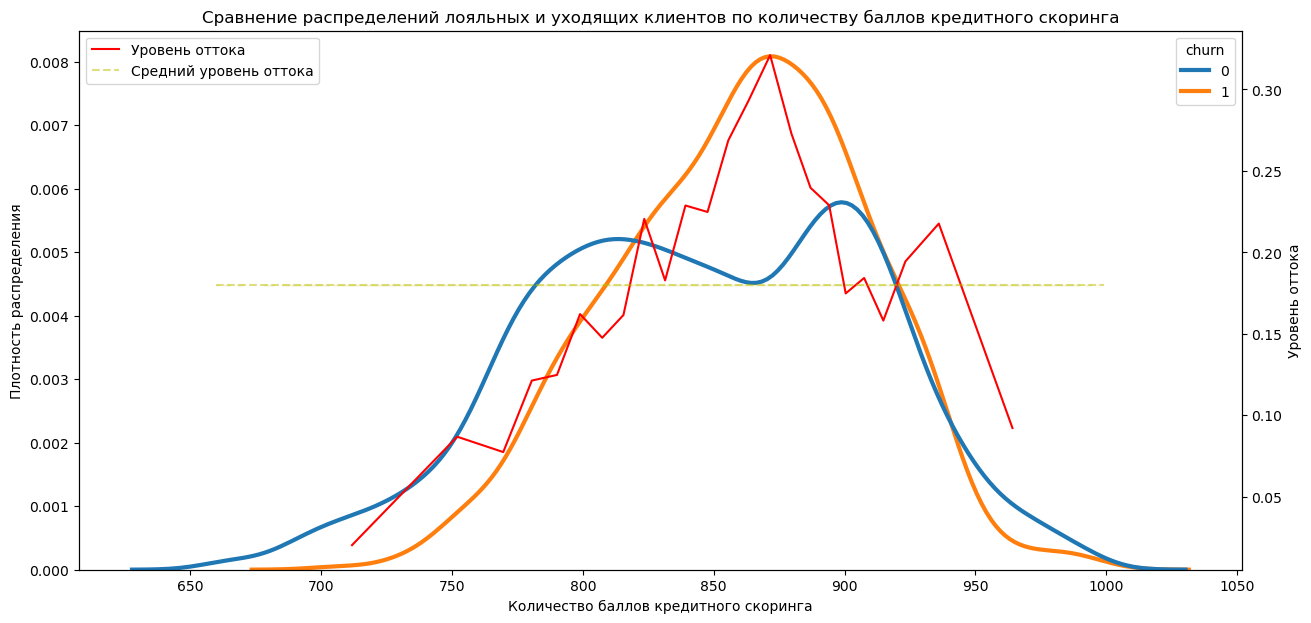

In [60]:
# визуализируем связь с количеством баллов кредитного скоринга
data_cut_score = data.groupby('cut_score').agg({'score':'mean', 'churn':'mean'})

plt.figure(figsize=(15,7))
ax=sns.kdeplot(data=data, x='score', hue='churn', common_norm=False, linewidth=3, legend=True)
plt.title('Сравнение распределений лояльных и уходящих клиентов по количеству баллов кредитного скоринга')
plt.xlabel('Количество баллов кредитного скоринга')
plt.ylabel('Плотность распределения')
ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=data_cut_score['score'], y=data_cut_score['churn'], ax=ax2, linestyle='-', color='r', 
                         label='Уровень оттока')
lineplot21 = sns.lineplot(x=data['score'], y=((data['churn'].mean()).round(2)), ax=ax2, linestyle='--', color='y', 
                          alpha=0.5, label='Средний уровень оттока')
plt.legend(loc='upper left')
plt.ylabel('Уровень оттока')

plt.show;

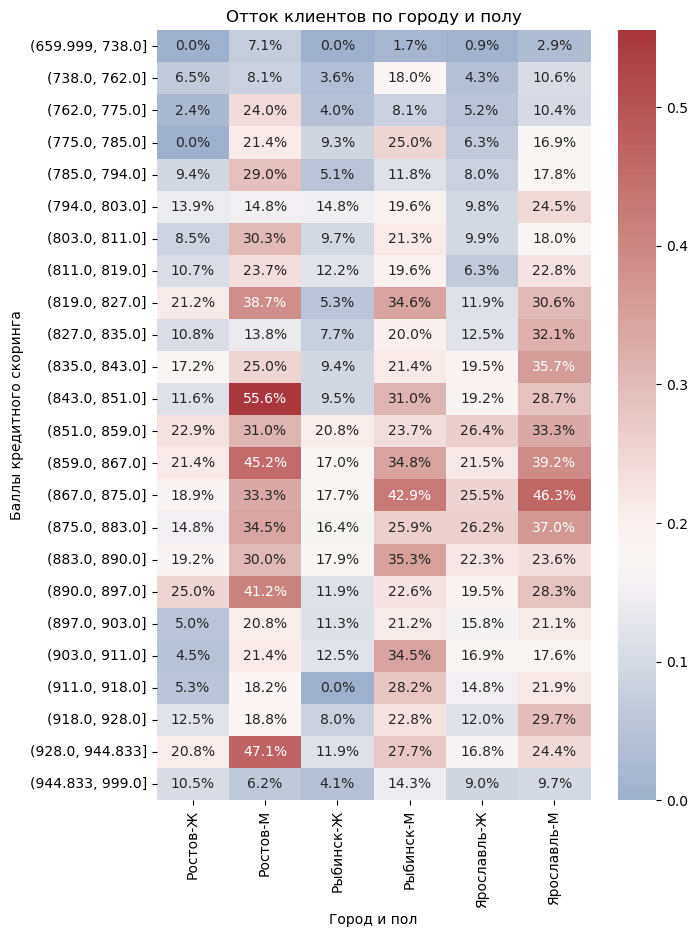

In [61]:
#оценим уровни оттока в разбивке по полу и городу
plt.figure(figsize=(7,10))
sns.heatmap(pivot_group(('city', 'gender'), 'cut_score'), annot=True, fmt='.1%', cmap='vlag', center=0.18)
plt.title('Отток клиентов по городу и полу')
plt.xlabel('Город и пол')
plt.ylabel('Баллы кредитного скоринга')
plt.show;

<p></p>

<div style="border:solid black 1px; padding: 20px">


Отток клиентов превышает средний уровень в диапазоне от 820 до 900 баллов кредитного скоринга.
    
</div>
<p></p>

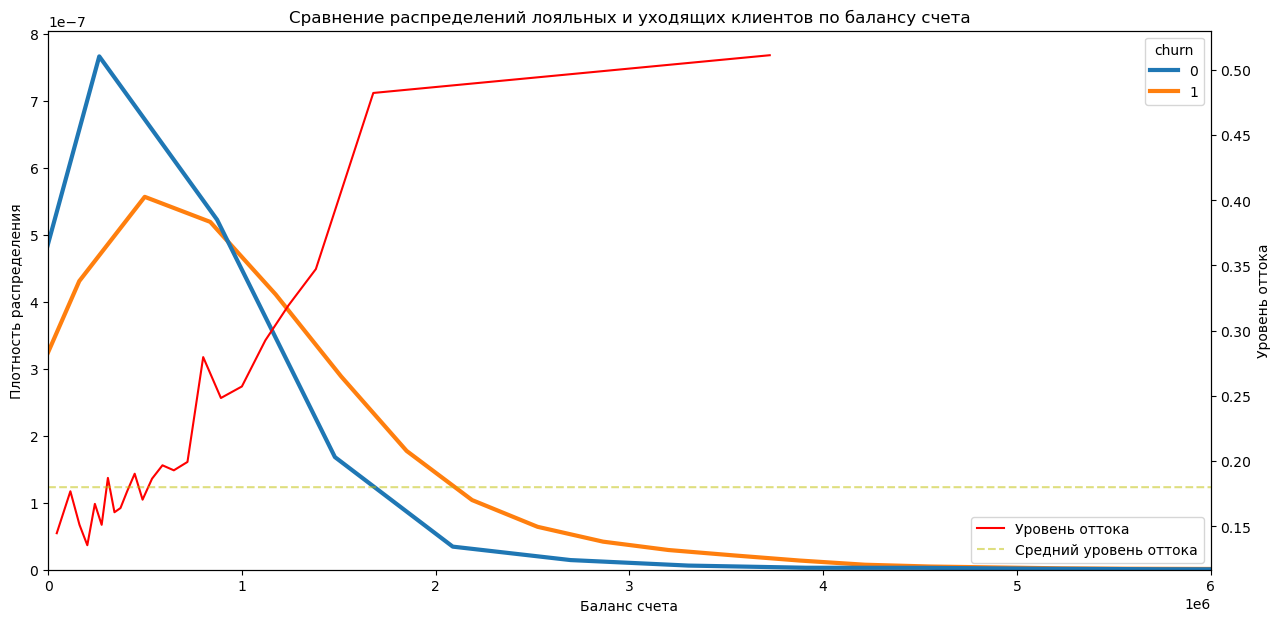

In [62]:
# визуализируем связь с балансом счета
data_cut_balance = data.groupby('cut_balance').agg({'balance':'mean', 'churn':'mean'})

plt.figure(figsize=(15,7))
ax =sns.kdeplot(data=data, x='balance', hue='churn', common_norm=False, linewidth=3)
plt.xlim(0, 6000000)
plt.title('Сравнение распределений лояльных и уходящих клиентов по балансу счета')
plt.xlabel('Баланс счета')
plt.ylabel('Плотность распределения')

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=data_cut_balance['balance'], y=data_cut_balance['churn'], ax=ax2, linestyle='-', color='r', 
                         label='Уровень оттока')
lineplot21 = sns.lineplot(x=data['balance'], y=((data['churn'].mean()).round(2)), ax=ax2, linestyle='--', color='y', 
                          alpha=0.5, label='Средний уровень оттока')
plt.legend(loc='lower right')
plt.ylabel('Уровень оттока')

plt.show;


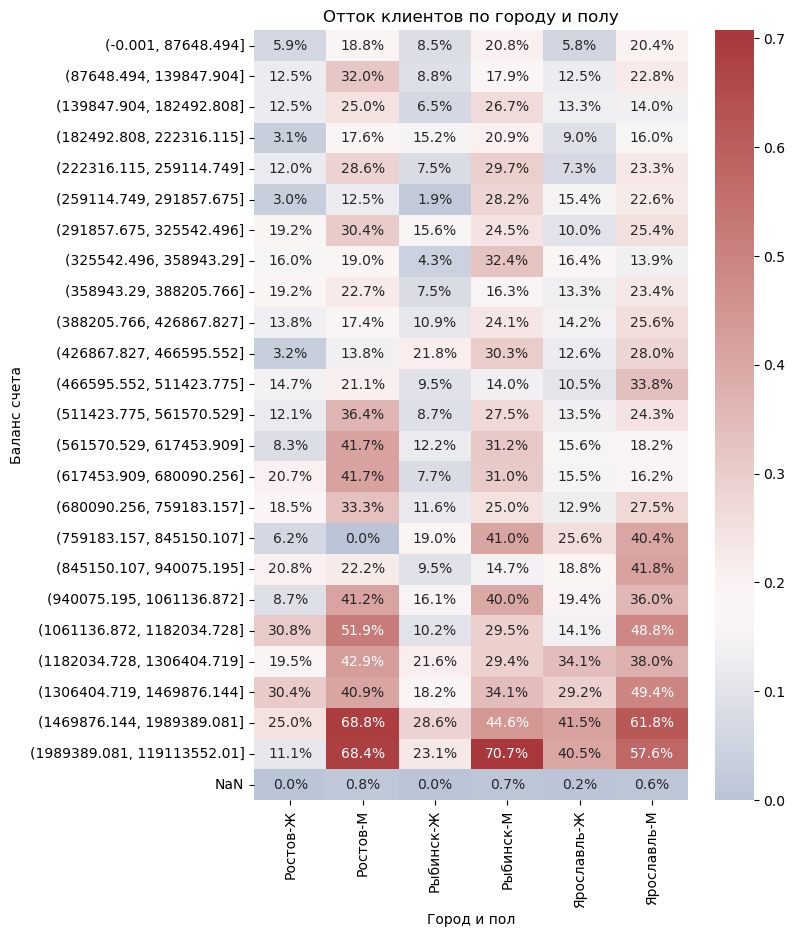

In [63]:
#оценим уровни оттока в разбивке по полу и городу
plt.figure(figsize=(7,10))
sns.heatmap(pivot_group(('city', 'gender'), 'cut_balance'), annot=True, fmt='.1%', cmap='vlag', center=0.18)
plt.title('Отток клиентов по городу и полу')
plt.xlabel('Город и пол')
plt.ylabel('Баланс счета')
plt.show;

<div style="border:solid black 1px; padding: 20px">

Отток клиентов превышает средний уровень при достижении суммы баланса на счету от 700 000, при накоплении свыше 1 500 000 уровень оттока клиентов превышает средний уровень в два раза.<p>
Отмечаются особенности оттока по полу и городу проживания: среди женщин отток возрастает при достижении накоплений на счете свыше 1 200 000, в Ростове повышается отток среди клиентов-мужчин при балансе на счете в размере от 500 000 до 700 000. 
    
</div>
<p></p>

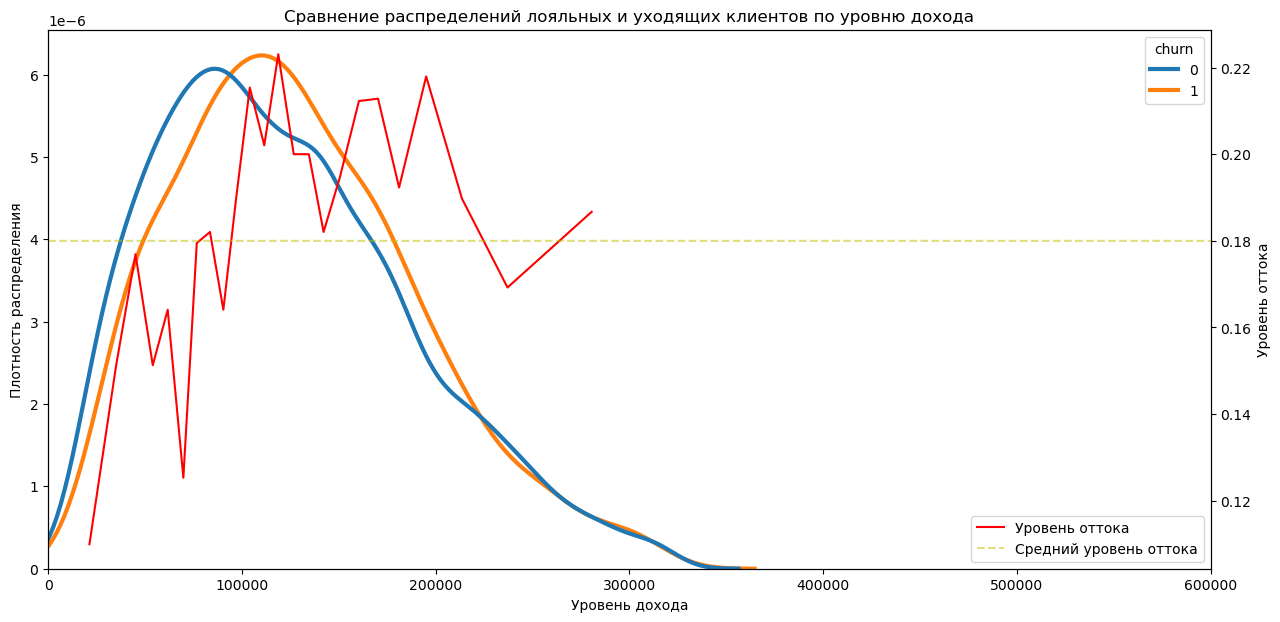

In [64]:
# визуализируем связь с уровнем дохода
data_cut_salary = data.groupby('cut_salary').agg({'est_salary':'mean', 'churn':'mean'})

plt.figure(figsize=(15,7))
ax=sns.kdeplot(data=data, x='est_salary', hue='churn', common_norm=False, linewidth=3)
plt.xlim(0, 600000)
plt.title('Сравнение распределений лояльных и уходящих клиентов по уровню дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Плотность распределения')

ax2 = ax.twinx()
lineplot4 = sns.lineplot(x=data_cut_salary['est_salary'], y=data_cut_salary['churn'], ax=ax2, linestyle='-', color='r', 
                         label='Уровень оттока')
lineplot41 = sns.lineplot(x=data['balance'], y=((data['churn'].mean()).round(2)), ax=ax2, linestyle='--', color='y', 
                          alpha=0.5, label='Средний уровень оттока')
plt.ylabel('Уровень оттока')
plt.legend(loc='lower right')
plt.show;

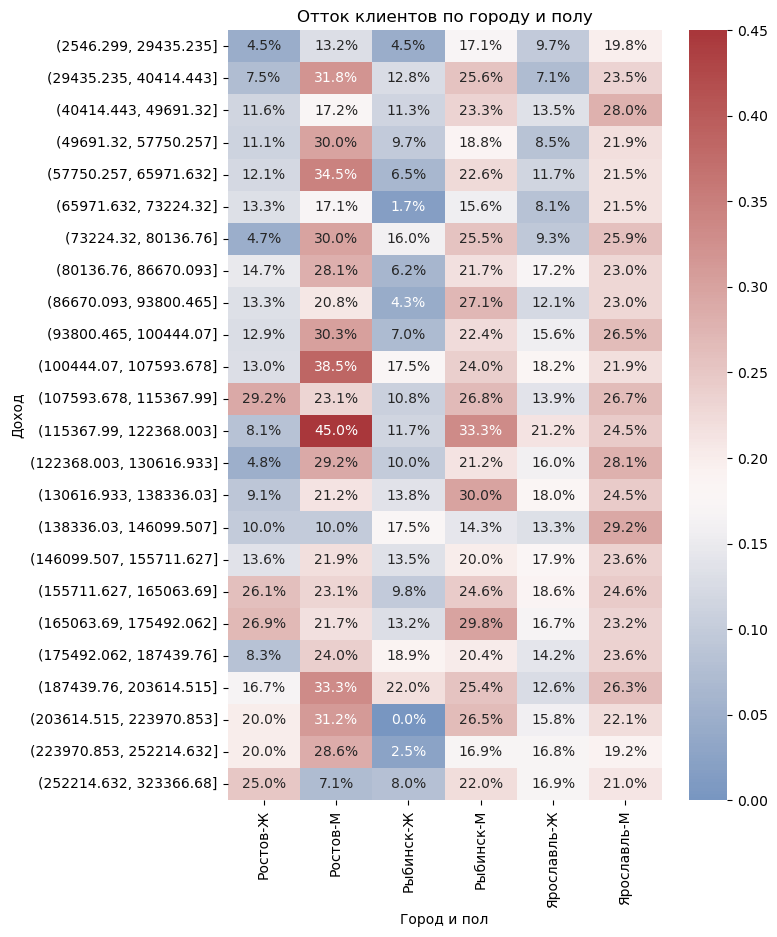

In [65]:
#оценим уровни оттока в разбивсе по полу и городу
plt.figure(figsize=(7,10))
sns.heatmap(pivot_group(('city', 'gender'), 'cut_salary'), annot=True, fmt='.1%', cmap='vlag', center=0.18)
plt.title('Отток клиентов по городу и полу')
plt.xlabel('Город и пол')
plt.ylabel('Доход')
plt.show;

<p></p>

<div style="border:solid black 1px; padding: 20px">

Значительных отличий в распределении лояльных и уходящих клиентов по уровню дохода не наблюдается. Диаграммы почти совпадают, сдвиг среднего небольшой. Уровень оттока колеблется вокруг среднего, не превышая 8% диапазона, небольшое повышение доли оттока заметно на диаграмме рассеяния для диапазона доходов от 100 000 до 200 000, но при анализе сегментов видно отсутствие общей тенденции и разброс значений.
    
</div>
<p></p>

In [66]:
#проверим отток среди vip-клиентов
vip.mean().round(2)

user_id           170843.54
score                880.66
age                   41.96
equity                 1.56
balance          4413314.59
products               1.61
credit_card            0.74
last_activity          0.57
est_salary        631442.16
churn                  0.16
dtype: float64

<p></p>

<div style="border:solid black 1px; padding: 20px">

Отток среди клиентов данной категории ниже среднего.
    
</div>
<p></p>

##### Корреляционный анализ:<a id='corr_analisis'>

In [67]:
#рассчитаем корреляцию непрерывных переменных расчетом коэффициента Пирсона
data_corr=data.corr()
data_corr

user_id     score       age    equity   balance  products  \
user_id            1.000000  0.005084  0.025097  0.003118 -0.008193 -0.009764   
score              0.005084  1.000000 -0.005551  0.033856  0.167794 -0.030605   
age                0.025097 -0.005551  1.000000  0.027682  0.091398  0.026292   
equity             0.003118  0.033856  0.027682  1.000000  0.155385  0.408174   
balance           -0.008193  0.167794  0.091398  0.155385  1.000000  0.074603   
products          -0.009764 -0.030605  0.026292  0.408174  0.074603  1.000000   
credit_card        0.006718 -0.076125 -0.126489 -0.152339 -0.052919 -0.249165   
last_activity     -0.031737 -0.027850 -0.012982 -0.001913  0.017184  0.038528   
est_salary         0.006112  0.191444 -0.061021 -0.173995  0.135311 -0.124535   
churn             -0.014715  0.095140 -0.045256  0.251576  0.076590  0.287371   
city_id_Rostov    -0.034412 -0.036941  0.046429  0.026288 -0.025249 -0.014599   
city_id_Rybinsk    0.015093  0.008655  0.023867 -0.004299 -0.020525 -0.039918   
city_id_Yaroslavl  0.011145  0.018776 -0.054956 -0.015040  0.037053  0.046533   
gender_id          0.029276  0.005946 -0.209019 -0.019724  0.036539 -0.023095   

                   credit_card  last_activity  est_salary     churn  \
user_id               0.006718      -0.031737    0.006112 -0.014715   
score                -0.076125      -0.027850    0.191444  0.095140   
age                  -0.126489      -0.012982   -0.061021 -0.045256   
equity               -0.152339      -0.001913   -0.173995  0.251576   
balance              -0.052919       0.017184    0.135311  0.076590   
products             -0.249165       0.038528   -0.124535  0.287371   
credit_card           1.000000      -0.036712    0.015954 -0.126218   
last_activity        -0.036712       1.000000   -0.024532  0.167747   
est_salary            0.015954      -0.024532    1.000000  0.036670   
churn                -0.126218       0.167747    0.036670  1.000000   
city_id_Rostov       -0.097168       0.009725   -0.102607  0.002939   
city_id_Rybinsk      -0.051965       0.050579   -0.042444 -0.027594   
city_id_Yaroslavl     0.116832      -0.052648    0.112154  0.022789   
gender_id             0.128463      -0.015538    0.111715  0.142328   

                   city_id_Rostov  city_id_Rybinsk  city_id_Yaroslavl  \
user_id                 -0.034412         0.015093           0.011145   
score                   -0.036941         0.008655           0.018776   
age                      0.046429         0.023867          -0.054956   
equity                   0.026288        -0.004299          -0.015040   
balance                 -0.025249        -0.020525           0.037053   
products                -0.014599        -0.039918           0.046533   
credit_card             -0.097168        -0.051965           0.116832   
last_activity            0.009725         0.050579          -0.052648   
est_salary              -0.102607        -0.042444           0.112154   
churn                    0.002939        -0.027594           0.022789   
city_id_Rostov           1.000000        -0.255956          -0.488713   
city_id_Rybinsk         -0.255956         1.000000          -0.718293   
city_id_Yaroslavl       -0.488713        -0.718293           1.000000   
gender_id               -0.010489        -0.010071           0.016638   

                   gender_id  
user_id             0.029276  
score               0.005946  
age                -0.209019  
equity             -0.019724  
balance             0.036539  
products           -0.023095  
credit_card         0.128463  
last_activity      -0.015538  
est_salary          0.111715  
churn               0.142328  
city_id_Rostov     -0.010489  
city_id_Rybinsk    -0.010071  
city_id_Yaroslavl   0.016638  
gender_id           1.000000

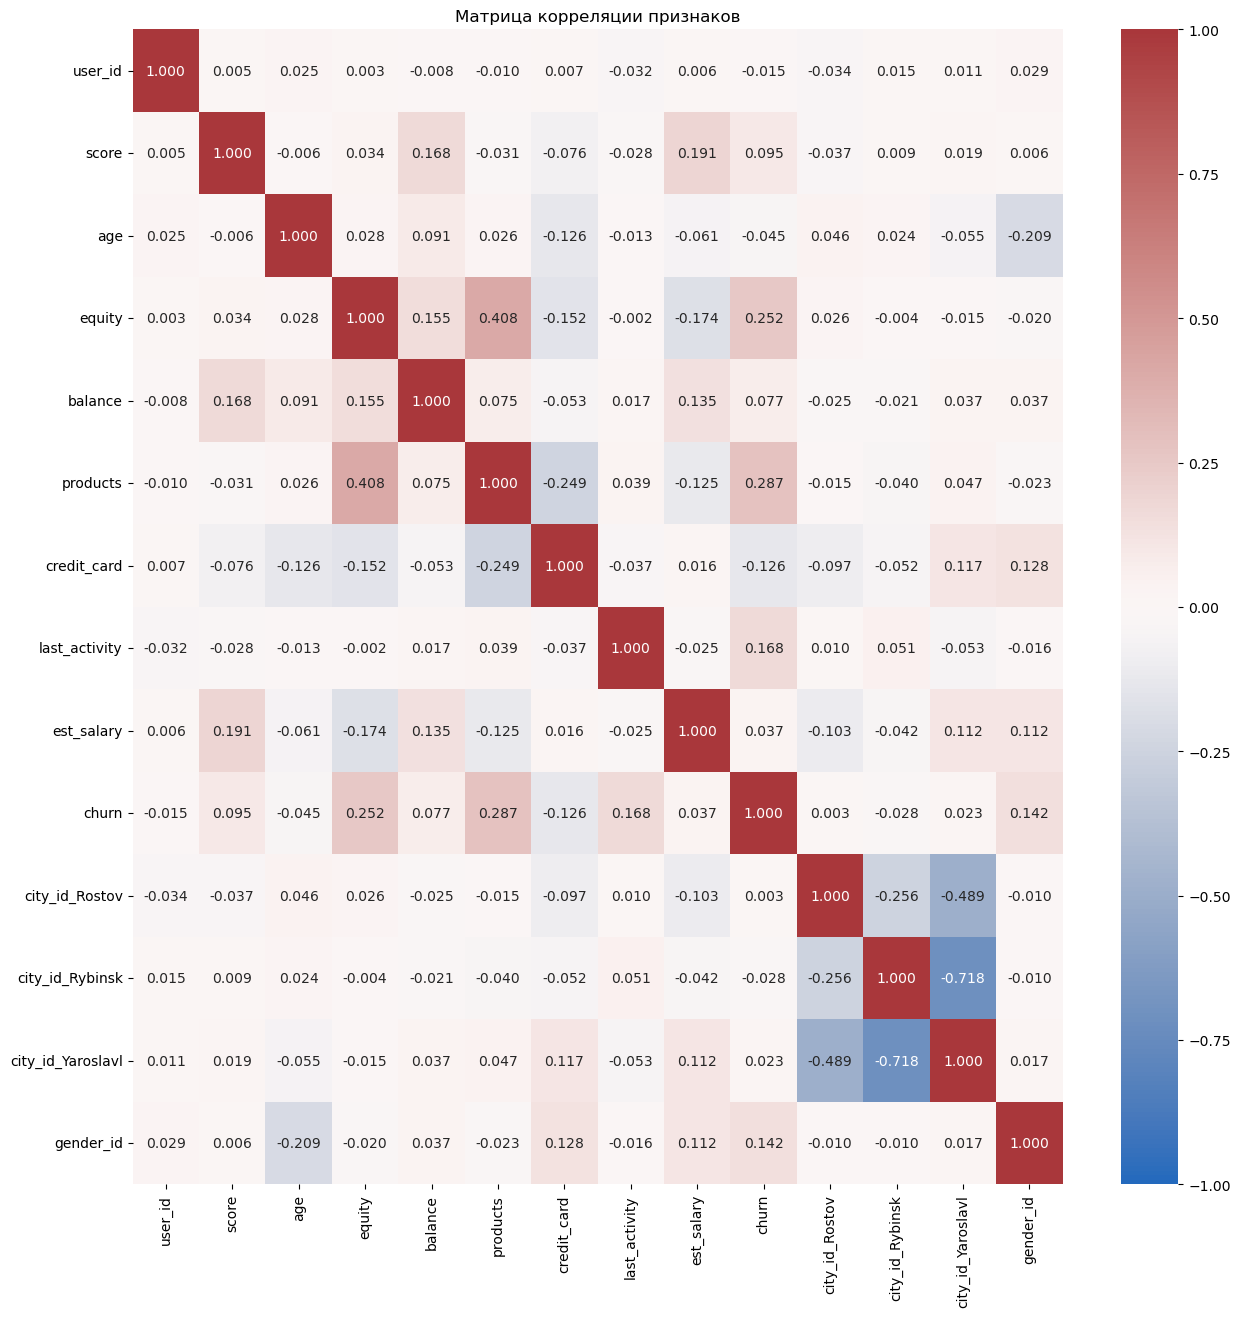

In [68]:
#визуализируем корреляцию переменных
plt.figure(figsize=(15,15))
sns.heatmap(data_corr, vmin=-1.0, vmax=1.0, cmap='vlag', center=0, annot=True, fmt='.3f')
plt.title('Матрица корреляции признаков')
plt.show;

<div style="border:solid black 1px; padding: 20px">

1. Для признака оттока клиентов обнаружены следующие взаимосвязи:<p>
   - слабая корреляция с количеством используемых продуктов (+0.287), количеством баллов собственности (+0.252), признаком активности (+0.168) и полом (+0.142),<p>
   - слабая отрицательная корреляция с признаком пользования кредитной картой (-0.126). <p>
    
2. Из исследуемых непрерывных признаков умеренная корреляция наблюдается между:<p>
   - количеством используемых продуктов и количеством баллов собственности (+0.408). <p>

3. Слабая положительная корреляция обнаружена между:<p>
   - балансом счета и количеством баллов кредитного скоринга (+0.168),<p>
   - балансом счета и количеством баллов собственности (+0.155),<p>
   - уровнем дохода и количеством баллов кредитного скоринга (+0.191),<p>
   - уровнем дохода и балансом счета(+0.135), <p>
   - признаком пользования кредитной картой и полом (+0.128),<p>
   - признаком пользования кредитной картой и проживанием в Ярославле (+0.117),<p>
   - уровнем дохода и проживанием в Ярославле (+0.112).<p>
4. Слабая отрицательная корреляция выявлена между:<p>
   - уровнем дохода и количеством баллов собственности (-0.174),<p>
   - уровнем дохода и количеством используемых продуктов (-0.125).<p>
   - признаком пользования кредитной картой и возрастом клиентов (-0.126),<p>
   - признаком пользования кредитной картой и количеством баллов собственности (-0.152),<p>
   - признаком пользования кредитной картой и количеством используемых продуктов (-0.249),<p>
   - полом и возрастом (-0.209),<p>
   - уровнем дохода и проживанием в Ростове (+0.103).
    
</div>



### Вывод<a id='summary_analysis'>

<p></p>

<div style="border:solid green 2px; padding: 20px">
Мы изучили портреты лояльных и отточных клиентов, и уровень оттока среди клиентов различных категорий. <p> 
Чаще отказываются от услуг банка клиенты с 3 и более баллами собственности, пользующиеся не менее чем 3 продуктами банка, накопившие на счете более 750 000. 
В категории риска также входят клиенты, совершавшие банковские операции в последний месяц, но не использующие активно кредитные карты. Из анкетных признаков повышенный уровень оттока среди клиентов-мужчин, проживающих в областных центрах.  
Различий между лояльными и уходящими клиентами по среднему уровню дохода не наблюдается.  <p>
    
При расчете корреляции между признаками не было получено значений, превышающих 0.5. Из обнаруженных связей самая сильная - умеренная корреляция между количеством используемых продуктов и количеством баллов собственности (+0.408). <p>

Для признака оттока клиентов подвтерждена корреляция с количеством используемых продуктов (+0.287), количеством баллов собственности (+0.252), признаком активности (+0.168), полом (+0.142) и с признаком пользования кредитной картой (-0.130). <p>

Статистически проверим гипотезу о различиях по возрасту среди лояльных клиентов и уходящих из банка. На диаграммах отражались различия в распределении и пики оттока, однако корреляции между возрастом и оттоком не было выявлено и различия в средних составляют всего 1 год. <p>
Также необнозначная ситуация с балансом счета клиента - математические различия в средних значительны, но корреляции с оттоком не обнаружено, и количеством баллов кредитного скоринга - математические различия средних невелики, а в расчете проявилась слабая корреляция с признаком оттока. Проверим значимость различий по этим признакам статистически. <p> 

</div>

## Шаг 3. Проверка гипотез:<a id='stats'>

##### Проверка гипотезы о различиях доходов:<a id='H_salary'>

<p></p>

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что уровень дохода у лояльных клиентов и клиентов, уходящих из банка, не различается. <p>
    Альтернативная гипотеза - уровень дохода у лояльных клиентов и клиентов, уходящих из банка, различается.
    </div>
<p></p>

In [69]:
print('Объем меньшей выборки -', data[data['churn']==1]['est_salary'].count(),
      ', Объем большей выборки -', data[data['churn']==0]['est_salary'].count())

Объем меньшей выборки - 1714 , Объем большей выборки - 7651


<div style="border:solid black 1px; padding: 20px">
    Учитывая достаточно большой объем выборок, компенсирующий характер распределения, и поправку на различающиеся объемы выборок, используем для проверки гипотезы Т-тест.
</div>

In [70]:
alpha=0.01
t_result = st.ttest_ind(data[data['churn']==0]['est_salary'], data[data['churn']==1]['est_salary'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в уровне дохода между группами составляют {0:.1%}'.format(data[data['churn']==0]['est_salary'].mean()/
                                                                          data[data['churn']==1]['est_salary'].mean()-1)) 

p-value = 0.00026245159652690423
Отвергаем нулевую гипотезу
Различия в уровне дохода между группами составляют -4.8%


<div style="border:solid black 1px; padding: 20px">
    По результатам Т-теста мы можем отвергнуть нулевую гипотезу, - существуют статистически значимые различия в уровне дохода клиентов, лояльных банку, и уходящих из банка. <p>
</div>

##### Проверка гипотезы о различиях среднего возраста:<a id='H_age'>

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что средний возраст у лояльных клиентов и клиентов, уходящих из банка, не различается. <p>
    Альтернативная гипотеза - существуют различия в среднем возрасте лояльных клиентов и клиентов, уходящих из банка.<p>
    
С учетом большей точности Т-теста и допустимости его использования с точки зрения размера выборок, применим для проверки гипотезы Т-тест.
</div>


In [71]:
t_result = st.ttest_ind(data[data['churn']==0]['age'], data[data['churn']==1]['age'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в возрасте между группами составляют {0:.1%}'.format(data[data['churn']==0]['age'].mean()/
                                                                          data[data['churn']==1]['age'].mean()-1)) 

p-value = 3.4018497029627638e-06
Отвергаем нулевую гипотезу
Различия в возрасте между группами составляют 3.4%


<div style="border:solid black 1px; padding: 20px">
    Результаты Т-теста позволяют отвергнуть нулевую гипотезу, - существуют статистически значимые различия в возрасте клиентов, лояльных банку, и уходящих из банка. Несмотря на небольшие математические различия в средних, этот критерий стоит использовать в качестве одного из критериев сегментирования клиентов.<p>
</div>

##### Проверка гипотезы о различиях баланса счета:<a id='H_balance'>

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что баланс счета у лояльных клиентов и клиентов, уходящих из банка, не различается. <p>
    Альтернативная гипотеза - существуют различия в балансе счета лояльных клиентов и клиентов, уходящих из банка.<p>
    
Применим для проверки гипотезы Т-тест.
</div>


In [72]:
t_result = st.ttest_ind(data.query('churn==0 and not balance.isna()')['balance'], 
                        data.query('churn==1 and not balance.isna()')['balance'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в балансе счета между группами составляют {0:.1%}'.
      format(data.query('churn==1 and not balance.isna()')['balance'].mean()/
             data.query('churn==0 and not balance.isna()')['balance'].mean()-1)) 

p-value = 2.4528997714088538e-11
Отвергаем нулевую гипотезу
Различия в балансе счета между группами составляют 49.1%


<div style="border:solid black 1px; padding: 20px">
    Результаты Т-теста позволяют отвергнуть нулевую гипотезу, - существуют статистически значимые различия между средними значениями баланса счета клиентов, лояльных банку, и уходящих из банка, несмотря на отсутствие корреляции между признаками.
</div>

##### Проверка гипотезы о различиях  оттока по количеству баллов кредитного скоринга:<a id='H_score'>

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что количество баллов кредитного скоринга у лояльных клиентов и клиентов, уходящих из банка, не различается. <p>
    Альтернативная гипотеза - существуют различия в количестве баллов кредитного скоринга лояльных клиентов и клиентов, уходящих из банка.<p>
    
Применим для проверки гипотезы Т-тест.
</div>


In [73]:
t_result = st.ttest_ind(data.query('churn==0')['score'], data.query('churn==1')['score'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в количестве баллов кредитного скоринга между группами составляют {0:.1%}'.
      format(data.query('churn==0')['score'].mean()/data.query('churn==1')['score'].mean()-1)) 

p-value = 4.68404148020475e-28
Отвергаем нулевую гипотезу
Различия в количестве баллов кредитного скоринга между группами составляют -1.8%


<div style="border:solid black 1px; padding: 20px">
    Результаты Т-теста позволяют отвергнуть нулевую гипотезу, - существуют статистически значимые различия между средними значениями баланса счета клиентов, лояльных банку, и уходящих из банка, несмотря на слабую корреляцию между признаками и небольшую разницу в расчетных средних.
</div>

##### Проверка гипотезы о различиях  оттока по количеству используемых продуктов/баллов собственности:<a id='H_products+'>

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что доля оттока среди клиентов с разным количеством используемых продуктов/баллов собственности одинакова. <p>
    Альтернативная гипотеза -  доли оттока среди клиентов с разным количеством используемых продуктов/баллов собственности различаются.<p>
В качестве метода проверки гипотезы применим критерий хи-квадрат.
</div>


In [74]:
#проверим различия по количеству продуктов
chi_result = st.chi2_contingency(pd.crosstab(data.products,data.churn).T)
print(f'p-value =', chi_result[1])
if chi_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 3.5394702877049464e-186
Отвергаем нулевую гипотезу


In [75]:
#проверим различия по количеству баллов собственности
chi_result = st.chi2_contingency(pd.crosstab(data.equity,data.churn).T)
print(f'p-value =', chi_result[1])
if chi_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 1.0945789573499392e-123
Отвергаем нулевую гипотезу


<div style="border:solid black 1px; padding: 20px">
    Существуют статистически значимые различия между долей оттока клиентов среди клиентов с разным количеством используемых продуктов/баллов собственности. <p>
    Оба этих критерия можно использовать в качестве критерия сегментирования клиентов, однако в связи с наличием умеренной корреляции между ними целесообразно использовать один из них.
   
</div>



### Вывод <a id='summary_stats'>

<p></p>

<div style="border:solid green 2px; padding: 20px">

Мы изучили различия в уровне доходов и возрасте между лояльными клиентами банка и клиентами, отказывающимися от услуг банка. В отношении уровня дохода обнаружены статистически значимые различия, а возраст клиента может использоваться как критерий для сегментирования клиентов, поскольку наблюдаются статистически значимые различия между отточными и лояльными клиентами по данному признаку.<p>
    Кроме того, статистически значимые различия между категориями клиентов подтверждены по балансу счета, количеству баллов собственности и используемых продуктов банка.    

</div>


## Шаг 4. Промежуточные выводы:<a id='pre_summary'>

<div style="border:solid green 2px; padding: 20px">
    
**Количество используемых продуктов:**
- сильнее прочих признаков коррелирует с оттоком (+0.287),<p>
- разница в средних между лояльными и уходящими клиентами составляет 33%,<p>
- пороговые значения: уровень оттока среди клиентов, пользующиеся 3-5 продуктами банка выше среднего более чем на 10%,<p>
- статистическая проверка подтверждает наличие значимых различий между лояльными и отточными клиентами по количеству используемых продуктов, <p>
- умеренно коррелирует с количеством баллов собственности (+0.408), слабая отрицательная корреляция обнаруживается с уровнем дохода (-0.125) и использованием кредитных карт (-0.249).<p>
    
**Количество баллов собственности:**
- слабо коррелирует с оттоком (+0.252),<p>
- среднее количество баллов собственности отточных клиентов на 51% выше в сравнении с лояльными клиентами,<p>
- пороговые значения: отток превышает средний показатель, начиная с 3 баллов собственности, от 5 и более баллов отток выше среднего более чем на 10%, среди клиентов с максимальными 9 баллами собственности количество уходящих клиентов превышает число лояльных,<p>
- статистическая проверка подтверждает наличие значимых различий между лояльными и отточными клиентами по количеству баллов собственности, <p>
- положительно коррелирует с балансом счета(+0.155) и отрицательно с уровнем дохода (-0.174) и использованием кредитной карты (-0.152).<p>

**Признак активности клиента:**
- слабо положительно коррелирует с оттоком (+0.168),<p>   
- уходящие из банка клиенты на 46% чаще совершают действия,<p>
- помимо корреляции с оттоком других взаимосвязей не обнаружено.<p>

**Пол:**
- слабо коррелирует с оттоком (+0.142);<p>
- отток среди мужчин выше на 41%,<p>
- слабо положительно коррелирует с использованием кредитной карты (+0.128), и отрицательно с возрастом (-0.209).<p>
        
**Использование кредитных карт:**
- слабо отицательно коррелирует с оттоком (-0.126),<p>
- отток среди пользователей кредитных карт на 21% ниже, по сравнению с клиентами, не использующими данный продукт,<p>
- слабо положительно коррелирует с проживанием в Ярославле (+0.117), и отрицательно - с возрастом клиентов (-0.126).<p>
      
**Баллы кредитного скоринга:**
- корреляция с оттоком составляет +0.095,<p>
- разница в средних между лояльными и уходящими клиентами составляет 1.8%,<p>
- пороговые значения: отток клиентов превышает средний уровень в диапазоне от 820 до 900 баллов кредитного скоринга,<p>
- статистическая проверка подтверждает наличие значимых различий между лояльными и отточными клиентами по количеству баллов кредитного скоринга, <p>
- слабо коррелирует с балансом счета (+0.168) и уровнем дохода (+0.191).<p>
       
**Баланс счета:**
- корреляция с оттоком не достигает существенных значений (+0.077),<p>
- в среднем на счетах уходящих клиентов накоплено на 54% больше средств, чем у лояльных клиентов,<p>
- пороговые значения: отток клиентов превышает средний уровень при достижении суммы баланса на счету от 700 000, при накоплении свыше 1 500 000 уровень оттока клиентов превышает средний уровень в два раза. Среди женщин отток возрастает при достижении накоплений на счете свыше 1 200 000, в Ростове повышается отток среди клиентов-мужчин при балансе на счете в размере от 500 000 до 700 000,<p>
- статистическая проверка подтверждает наличие значимых различий между лояльными и отточными клиентами по балансу счета, <p>
- умеренно коррелирует с уровнем дохода (+0.135).<p>
       
**Возраст:**
- корреляция с оттоком не достигает существенных значений (-0.045),<p>
- разница в средних между лояльными и уходящими клиентами невелика и составляет 3.3%,<p>
- вместе с тем были выявлены статистически значимые различия в возрасте клиентов, лояльных банку, и уходящих из банка.<p>
- связь оттока клиентов с возрастом нелинейна: отток выше в возрастных группах от 25 до 34 лет, а также с 50 до 60 лет, причем преимущественно за счет мужчин, независимо от города проживания.<p>
      
**Город:**
- корреляция с оттоком не достигает существенных значений и в разных городах колеблется в диапазоне от +0.023 до -0.028,<p>
- наименьший отток наблюдается в Рыбинске (16.3%), в областных центрах отток сопоставим со средним уровнем (18.7%),
- проживание в областных центрах слабо положительно коррелирует с уровнем дохода: в Ярославле (+0.112) и Ростове (+0.103).<p>
       
**Доход:**
- корреляция с оттоком не достигает существенных значений (+0.037), <p>    
- разница в средних между лояльными и уходящими клиентами составляет 5%,<p>
- пороговые значения: значительных отличий в распределении лояльных и уходящих клиентов по уровню дохода не наблюдается, уровень оттока колеблется вокруг среднего, не превышая 8% диапазона,заметно на диаграмме рассеяния для диапазона доходов от 100 000 до 200 000, но при анализе сегментов видно отсутствие общей тенденции и разброс значений. Хотя статистическая проверка обнаружила значимые различия.<p> 

**Приоритетность использования признаков для сегментирования:**<p> 
Основные: 
1. Количество используемых продуктов (более 3) или количество баллов собственности (более 5),
2. Пол (мужской),
3. Баланс счета (более 700 000) или количество баллов кредитного скоринга(820-900),<p>  
Дополнительные:
4. Возраст (от 25 до 34 или от 50 до 60),
5. Город (все, кроме Рыбинска),
6. Использование кредитных карт (не используют),  
7. Активность (высокая активность),  
8. Доход.   
 
    
</div>


## Шаг 5. Сегментирование клиентов:<a id='segment'>

##### Выделение сегментов клиентов:<a id='make_segment'>

In [76]:
#применим из основных признаков количество продуктов и из дополнительных - активность
data.query('products>=3 and last_activity==1').agg({'churn':'mean', 'user_id':'count'})

churn        0.463035
user_id    771.000000
dtype: float64

In [77]:
#применим из основных критериев баланс счета и из дополнительных возраст
data.query('balance>700000 and 25<=age<=34').agg({'churn':'mean', 'user_id':'count'})

churn        0.486974
user_id    499.000000
dtype: float64

In [78]:
#для того же сочетания критериев изменим диапазон возраста
data.query('balance>700000 and 50<=age<=60').agg({'churn':'mean', 'user_id':'count'})

churn        0.433172
user_id    621.000000
dtype: float64

In [79]:
#применим два основных критерия: количество баллов собственности и пол, и из дополнительных город
data.query('city_id_Rybinsk==0 and equity>=5 and gender_id==1').agg({'churn':'mean', 'user_id':'count'})

churn        0.414729
user_id    774.000000
dtype: float64

In [80]:
#применим два основных критерия: количество баллов кредитного скоринга и пол, и из дополнительных пользование кредитной картой
data.query('820<=score<=900 and credit_card==0 and gender_id==1').agg({'churn':'mean', 'user_id':'count'})

churn        0.412646
user_id    601.000000
dtype: float64

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Выделено пять сегментов, размер каждого от 500 до 1000 клиентов, уровень оттока не менее 40%. При выделении сегментов охвачены все признаки и зоны риска, кроме уровня дохода.
    </div>
<p></p>

##### Калибровка сегментов:<a id='size_segment'>

In [81]:
#проверим охват клиентов
(data.query('products>=3 and last_activity==1')['user_id'].append(
data.query('balance>=700000 and 50<=age<=60')['user_id']).append(
data.query('balance>=700000 and 25<=age<=34')['user_id']).append(
data.query('city_id_Rybinsk==0 and equity>=5 and gender_id==1')['user_id']).append(
data.query('820<=score<=900 and credit_card==0 and gender_id==1')['user_id']).nunique())/data['churn'].count()

0.27122263747997866

In [82]:
#проверим охват оттока выделенными сегментами
(data.query('products>=3 and last_activity==1')['user_id'].append(
data.query('balance>=700000 and 50<=age<=60')['user_id']).append(
data.query('balance>=700000 and 25<=age<=35')['user_id']).append(
data.query('city_id_Rybinsk==0 and equity>=5 and gender_id==1')['user_id']).append(
data.query('820<=score<=900 and credit_card==0 and gender_id==1')['user_id']).nunique())*(
(data.query('products>=3 and last_activity==1')['churn'].mean()+
data.query('balance>=700000 and 50<=age<=60')['churn'].mean()+
data.query('balance>=700000 and 25<=age<=34')['churn'].mean()+
data.query('city_id_Rybinsk==0 and equity>=5 and gender_id==1')['churn'].mean()+
data.query('820<=score<=900 and credit_card==0 and gender_id==1')['churn'].mean())/5)/data['churn'].sum()

0.6752898963150913

<p></p>

<div style="border:solid black 1px; padding: 20px">
   Предложенные сегменты охватывают 27% клиентов банка, при этом охват клиентов, покидающих банк, достигает 67%.
</div>
<p></p>


### Вывод <a id='summary_segment'>

<p></p>

<div style="border:solid green 2px; padding: 20px">

Выделены 5 сегментов клиентов с уровнем оттока более 40% в каждом. В совокупности они охватывают 67% уходящих клиентов. При формировании сегментов учтены основные зоны риска и все существенные признаки, отличающие отточных клиентов.    

</div>




##  Общий вывод  <a id='summary_final'>

<p></p>

<div style="border:solid green 2px; padding: 20px">

В ходе исследования была изучена информация о 10 000 клиентов банка. В рамках предобработки данных удалены дубликаты, случайные пропуски данных и  выбросы по возрасту и баллам кредитного скоринга, в отдельный сегмент выведены клиенты с аномально высокими доходами и балансом счета. После удаления данных на этапе предобработки осталось 93,67% данных.<p>
На этапе исследовательского анализа данных изучены различия между лояльными и отточными клиентами по всем признакам, выделены границы зон риска по всем признакам, проведено исследование корреляции признаков между собой.<p>
Статистически были проверены гипотезы о различиях между лояльными и уходящими клиентами по уровню дохода, возрасту, балансу счета, количеству используемых продуктов и баллов собственности.<p>
Проведена сегментация клиентов по ключевым признакам, выделено пять сегментов с уровнем оттока не менее 40%, охватывающие 66% уходящих клиентов.<p>

                
**Рекомендации по работе с сегментами:**<p>

1. Активные клиенты, использующие не менее 3 банковских продуктов:<p>
   - портрет: клиенты, регулярно совершающие значимые действия, знакомые с большинством продуктов банка; 
   - рекомендации: в приоритетном порядке предлагать новые продукты и услуги, привлекать на этапе разработки продуктов в качестве эксперта (вовлекать в оценку продукта), предлагать комплементарные услуги и партнерские скидки, например, для ипотеки - на кредит на ремонт или скидки на приобретение мебели и техники.<p>
2. Клиенты с балансом счета не менее 700 000 в возрасте от 25 до 34 лет: <p>
   - портрет: молодые люди в активном жизненном периоде, владеющие накоплениями выше среднего уровня; 
   - рекомендации: рассылка аналитики и новостей по инвестированию, предложения по ипотеке, партнерские скидки и промо-акции на дорогостоящие предметы, например, автомобиль.<p>
3. Клиенты с балансом счета не менее 700 000 в возрасте от 50 до 60 лет: <p>
   - портрет:  клиенты, приближающиеся к пенсионному возрасту, накопившие на счетах сумму выше среднего;
   - рекомендации: вклады на длительный срок, предложения по инвестированию с низким риском, услуги по страхованию жизни, здоровья, собственности и защите от мошеннических действий. <p>
4. Мужчины, проживающие в Ростове или Ярославле, с количеством баллов собственности не менее 5: <p>
   - портрет: мужчины, владеющие несколькими дорогостоящими объектами собственности, проживающие в областном центре с высокой конкуренцией среди банков;
   - рекомендации: услуги по страхованию собственности и ответственности, сопровождение сделок с имуществом, снижение процента на банковские переводы при оплате сделок, защита от мошеннических действий, скидки на услуги партнеров, например, на юридические консультации или риэлторские услуги.<p>
5. Мужчины, с количеством баллов кредитного скоринга от 820 до 900, не пользующиеся кредитной картой: <p>    
   - портрет: мужчины, обладающие высоким потенциалом к одобрению кредита, но не пользующиеся кредитными картами;   
   - рекомендации: рассылка информации о партнерских скидках на дорогостоящие объекты собственности с дополнительным расчетом кредита, промо-акции на кредитные карты банка, например, снижение процента на N-месяцев.  
    
</div>

